# California Housing Price Prediction
#### Author: Sayorn Chin
#### Date: 2021-07-19

### Objective

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.



### Import required libraries

In [109]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib.lines import Line2D

### Data handling

In [110]:
## Assign the data frame as housing
housing = pd.read_excel('/Users/schinlfc/data-science-Python/california_housing_price_prediction/data/housing.xlsx')

In [111]:
## View the first 5 rows
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [112]:
## Get the number of rows and columns
housing.shape

(20640, 10)

In [113]:
## Get data types for each column
housing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [114]:
## Get basic summary statistics for float and integer column types
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [115]:
## Check for the sum of missing values for each column
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [116]:
## Fill the missing values of the 'total_bedrooms' column with its mean value
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)

In [117]:
## Check whether the missing values are filled
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [118]:
## Convert categorical column 'ocean_proximity' in the dataset to numerical data
housing = pd.get_dummies(housing, columns=['ocean_proximity'])

In [119]:
## Get name of all columns
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [120]:
## Rename columns

# Strip any white space
housing = housing.rename(columns=lambda x: x.strip())

# Define a dictionary of columns we want to rename
col_map = {'ocean_proximity_<1H OCEAN': '1h_ocean', 
           'ocean_proximity_INLAND': 'inland',
           'ocean_proximity_ISLAND': 'island',
           'ocean_proximity_NEAR BAY': 'near_bay',
           'ocean_proximity_NEAR OCEAN': 'near_ocean'}
# Rename columns with inplace=True
housing.rename(columns=col_map, inplace=True)

In [121]:
## Check to see if columns are successfully renamed
print(housing.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '1h_ocean', 'inland', 'island', 'near_bay',
       'near_ocean'],
      dtype='object')


In [122]:
## Check the data type of each column
housing.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
median_house_value      int64
1h_ocean                uint8
inland                  uint8
island                  uint8
near_bay                uint8
near_ocean              uint8
dtype: object

In [123]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '1h_ocean', 'inland', 'island', 'near_bay',
       'near_ocean'],
      dtype='object')

### Model building

<AxesSubplot:>

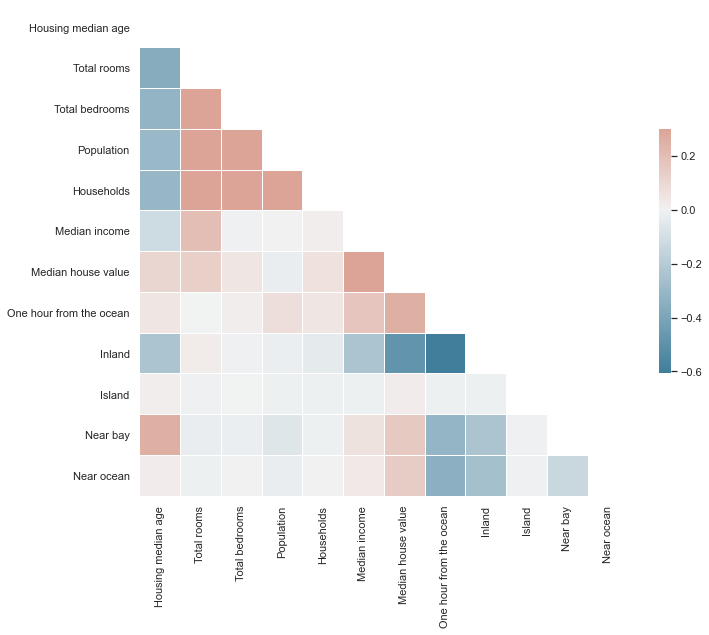

In [124]:
## Compute the crrelation matrix

# Set the theme 
sns.set_theme(style="white")

# Rename columns for this correlation matrix plot only
col_map2 = {'housing_median_age': 'Housing median age',
            'total_rooms': 'Total rooms',
            'total_bedrooms': 'Total bedrooms',
            'population': 'Population',
            'households': 'Households',
            'median_income': 'Median income',
            'median_house_value': 'Median house value',
            '1h_ocean': 'One hour from the ocean',
            'inland': 'Inland',
            'island': 'Island',
            'near_bay': 'Near bay',
            'near_ocean': 'Near ocean'}

housing_corr = housing.rename(columns=col_map2)

# Compute the correlation matrix without lon and lat variables
corr = housing_corr[['Housing median age',
                     'Total rooms', 
                     'Total bedrooms', 
                     'Population', 
                     'Households', 
                     'Median income', 
                     'Median house value', 
                     'One hour from the ocean', 
                     'Inland', 
                     'Island', 
                     'Near bay', 
                     'Near ocean']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [125]:
# Split the data into 80% training dataset and 20% test dataset
X = housing[['housing_median_age', 
             'total_rooms',
             'median_income', 
             'inland',
             'near_bay',
             'near_ocean']]
Y = housing[['median_house_value']]
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [126]:
## Check to see if the if the split is correct
print(f"The number of rows of the train dataset are: {x_train.shape[0]}")
print(f"The number of rows of the test dataset are: {x_test.shape[0]}")

The number of rows of the train dataset are: 16512
The number of rows of the test dataset are: 4128


In [127]:
## Standardize training and test datasets

# Note: Standardize features by removing the mean and scaling to unit variance
# The standard score of a sample x is calculated as:
# z = (x - u) / s
# where u is the mean of the training samples or zero if with_mean=False, 
# and s is the standard deviation of the training samples or one if with_std=False.

# Define a scaler object
scaler = StandardScaler()

In [128]:
# Standardize training dataset
x_train[['housing_median_age', 'total_rooms', 'median_income']] = scaler.fit_transform(x_train[['housing_median_age', 
                                                                                                'total_rooms', 
                                                                                                'median_income']])
x_train.head()

,housing_median_age,total_rooms,median_income,inland,near_bay,near_ocean
12069,-1.795076,-0.977736,0.190012,1,0,0
15925,1.855539,-0.118501,0.269311,0,1,0
11162,-0.207852,-0.421680,0.029895,0,0,0
4904,0.744482,-0.888566,-1.264470,0,0,0
4683,1.855539,-0.122159,-0.367016,0,0,0


In [129]:
# Standardize test dataset of x_test
x_test[['housing_median_age', 'total_rooms', 'median_income']] = scaler.fit_transform(x_test[['housing_median_age', 
                                                                                              'total_rooms', 
                                                                                              'median_income']])
x_test.head()

,housing_median_age,total_rooms,median_income,inland,near_bay,near_ocean
14740,-0.536695,-0.239438,0.162239,0,0,1
10101,0.261819,0.000808,1.032000,0,0,0
20566,0.022265,0.254015,0.267446,1,0,0
2670,0.661075,-0.883797,-0.746474,1,0,0
15709,-0.297141,-0.454224,0.618065,0,1,0


In [130]:
# Standardize test dataset of y_train
y_train[['median_house_value']] = scaler.fit_transform(y_train[['median_house_value']])
y_train.head()

,median_house_value
12069,2.530522
15925,0.542408
11162,-0.096379
4904,-0.764555
4683,0.153431


In [131]:
# Standardize test dataset of y_test
y_test[['median_house_value']] = scaler.fit_transform(y_test[['median_house_value']])
y_test.head()

,median_house_value
14740,-0.598818
10101,0.315441
20566,-0.040104
2670,-1.162786
15709,2.230656


In [132]:
## Perform Linear Regression on training data

# Define a linear regression object 
reg = LinearRegression()

# Fit the model
reg.fit(x_train, y_train)

LinearRegression()

In [133]:
# Get the coefficients
reg.fit(x_train, y_train).coef_

array([[ 0.12585266,  0.06522436,  0.62116224, -0.61022652,  0.09936045,
         0.15727489]])

In [134]:
# Get the intercept
reg.fit(x_train, y_train).intercept_

array([0.16175561])

In [135]:
# Predict output for test dataset using the fitted model
y_pred = reg.predict(x_test)

In [136]:
# Get Root Mean Squared Error (RMSE) from the model
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred, squared=False)}")

Root Mean Squared Error (RMSE): 0.6426217852518341


#### Bonus exercise: Perform Linear Regression with one independent variable

In [137]:
## Extract just the median_income column from the independent variables (from x_train and x_test)

# Extract only the median_income column from x_train and return a pandas data frame
x_train_mi = x_train[['median_income']]
x_train_mi.head()

,median_income
12069,0.190012
15925,0.269311
11162,0.029895
4904,-1.264470
4683,-0.367016


In [138]:
# Extract only the median_income column from x_test and return a pandas data frame
x_test_mi = x_test[['median_income']]
x_test_mi.head()

,median_income
14740,0.162239
10101,1.032000
20566,0.267446
2670,-0.746474
15709,0.618065


In [139]:
## Perform Linear Regression to predict housing values based on median_income

# Define a linear regression object 
reg_mi = LinearRegression()

# Fit the model
reg_mi.fit(x_train_mi, y_train)

LinearRegression()

In [140]:
# Get the coefficient
reg_mi.fit(x_train_mi, y_train).coef_

array([[0.69275835]])

In [141]:
# Get the intercept
reg_mi.fit(x_train_mi, y_train).intercept_

array([-4.65633805e-18])

In [142]:
## Predict output for test dataset using the fitted model
y_pred_mi = reg_mi.predict(x_test_mi)

In [143]:
## Get Root Mean Squared Error (RMSE) from the model with only median_income as an independent variable
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(y_test, y_pred_mi, squared=False)}")

Root Mean Squared Error (RMSE): 0.7439347363418634


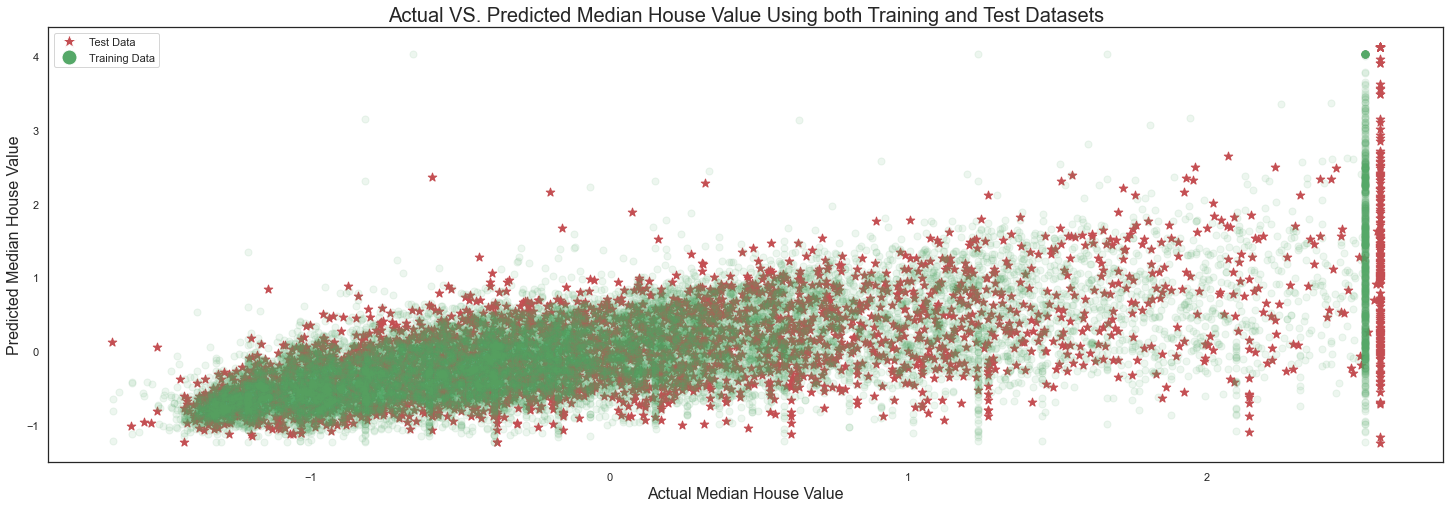

In [144]:
## Plot the fitted model for training data as well as for test data to 
#  check if the fitted model satisfies the test data
fig, ax = plt.subplots(figsize=(25,8))

legend_elements = [Line2D([0], [0], marker='*', color='w', label='Test Data',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='Training Data',
                          markerfacecolor='g', markersize=15)]

scatter1 = ax.scatter(y_test, 
            y_pred_mi,
            marker="*",
            color="r",
            s=80)

scatter2 = ax.scatter(y_train,
            reg_mi.predict(x_train_mi),
            marker="o",
            color="g",
            s=50,
            alpha=0.1)

ax.legend(handles=legend_elements, loc='upper left')
plt.title('Actual VS. Predicted Median House Value Using both Training and Test Datasets', fontsize=20)
plt.xlabel('Actual Median House Value', fontsize=16)
plt.ylabel('Predicted Median House Value', fontsize=16)

plt.show()